In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (10,7)

### 1) A:
A normal, or gaussian, distributions are useful to representing random variables with an unknown distribution, such as instrument noise. Their probability density function is

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

where $\sigma^2$ is the variance, which represents the "width" of the distribution, and $\mu$ is the mean, where the distribution is centered.
### B:
Using the CDF function, we can find the probability of finding a result between negative infinity and some value by integrating over the distribution. This value is called X$\sigma$, where X is the value divided by $\sigma$.

From the z table, we expect the probability for 1$\sigma$ to be 0.15866, 2$\sigma$ to be 0.02275, and 3$\sigma$ to be 0.00135.

In [2]:
p1 = stats.norm.cdf(-1, 0, 1)
p2 = stats.norm.cdf(-2, 0, 1)
p3 = stats.norm.cdf(-3, 0, 1)
print(f'The probability for 1 sigma is {p1:.5f}')
print(f'The probability for 2 sigma is {p2:.5f}')
print(f'The probability for 3 sigma is {p3:.5f}')

The probability for 1 sigma is 0.15866
The probability for 2 sigma is 0.02275
The probability for 3 sigma is 0.00135


These values match those expected from the z table.

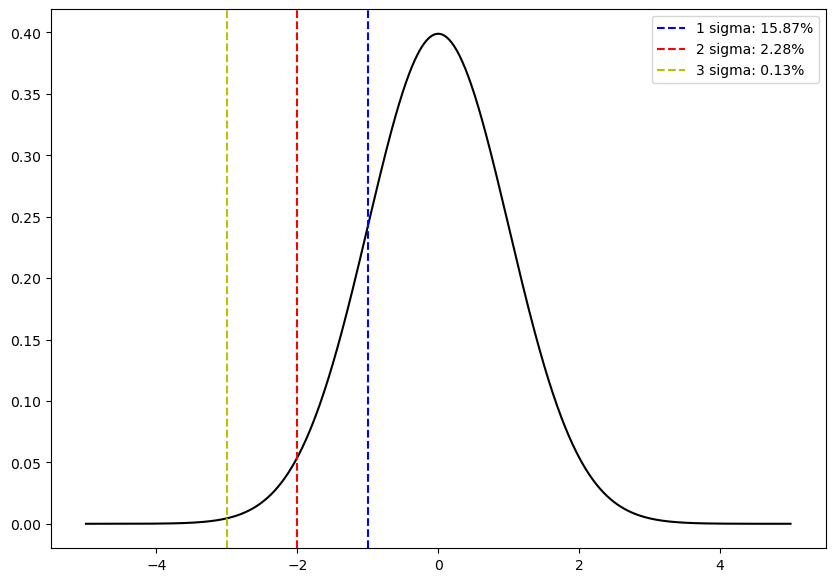

In [3]:
# Plotting the values of 1, 2, and 3 sigma on a normal distribution
fig, ax = plt.subplots()
x = np.linspace(-5, 5, 1000)
ax.plot(x, stats.norm.pdf(x, 0, 1), c='k')
ax.axvline(-1, linestyle='--', c='b', label=f'1 sigma: {p1*100:.2f}%')
ax.axvline(-2, linestyle='--', c='r', label=f'2 sigma: {p2*100:.2f}%')
ax.axvline(-3, linestyle='--', c='y', label=f'3 sigma: {p3*100:.2f}%')
ax.legend()

### C:

Using the PPF function, we can do the inverse and find the X$\sigma$ value for a normal distribution corresponding to some probability. Using the values from the z table, we should get the same $\sigma$ values as before.

In [4]:
# Taking absolute value, since cdf() and ppf() integrate from negative infinity and gives a negative sigma value.
print(f'A probability of 0.15866 corresponds to {np.abs(stats.norm.ppf(0.15866)):.5f} sigma.')
print(f'A probability of 0.02275 corresponds to {np.abs(stats.norm.ppf(0.02275)):.5f} sigma.')
print(f'A probability of 0.00135 corresponds to {np.abs(stats.norm.ppf(0.00135)):.5f} sigma.')

A probability of 0.15866 corresponds to 0.99998 sigma.
A probability of 0.02275 corresponds to 2.00000 sigma.
A probability of 0.00135 corresponds to 2.99998 sigma.


These values match the expected values, save for rounding errors.

### D:

The scipy functions integrate from negative infinity to positive infinity, so if the probability is below 50%, the sigma value will land on the left side of the distribution. Since the distribution is centered on 0 by default, this means the sigma value will be negative in that case. Since normal distributions are symmetric, this value is the same as integrating from positive infinity but the sign is flipped.

### 2) A:

For my distribution, I chose chi-squared, which has the probability density function

$$
f(x,k) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}
$$

which is the sum of the squares of k independent variables that have a normal distribution. The chi-squared distribution is often used to measure goodness of fit.

### B:

Now we generate distributions of 100k samples of random values with the chi-squared distribution, and then plot them against the probability density function

In [7]:
d1 = stats.chi2.rvs(df=1, size=100000)
d2 = stats.chi2.rvs(df=2, size=100000)
d3 = stats.chi2.rvs(df=3, size=100000)

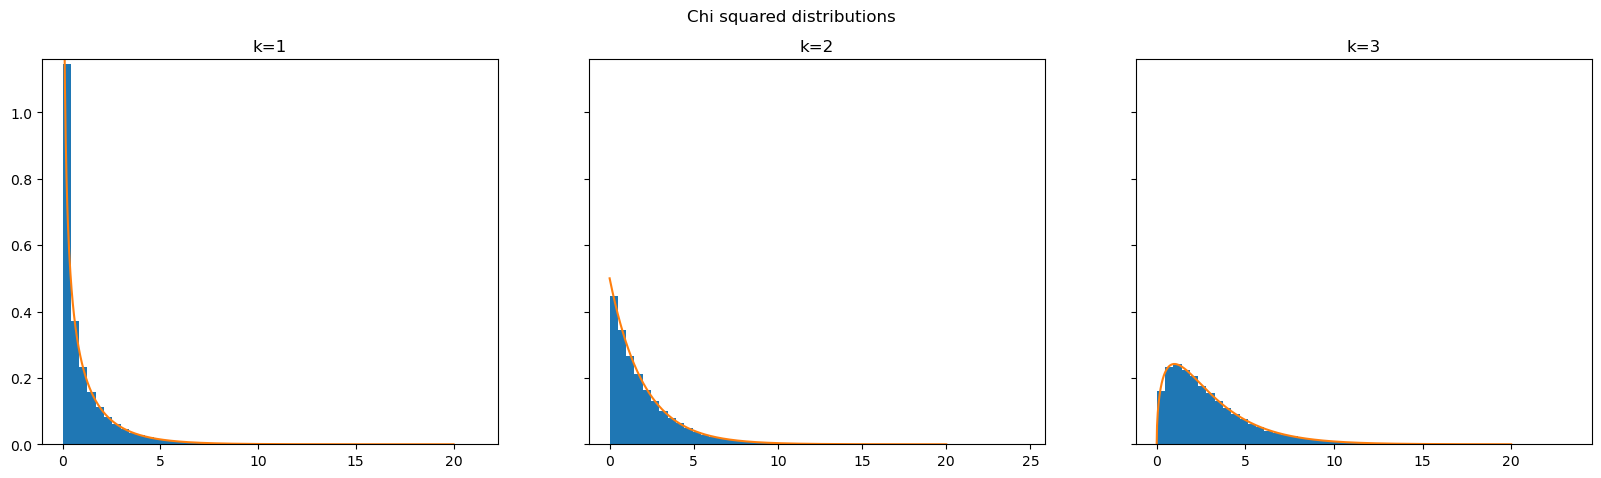

In [30]:
x = np.linspace(0, 20, 1000)

fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
ax[0].hist(d1, 50, density=True)
ax[0].plot(x, stats.chi2.pdf(x=x, df=1))
ax[0].set_title('k=1')
ax[1].hist(d2, 50, density=True)
ax[1].plot(x, stats.chi2.pdf(x=x, df=2))
ax[1].set_title('k=2')
ax[2].hist(d3, 50, density=True)
ax[2].plot(x, stats.chi2.pdf(x=x, df=3))
ax[2].set_title('k=3')
plt.ylim(0,1.16)
fig.suptitle('Chi squared distributions')
plt.show()

### 3) A:
I choose a value of 5 or greater for our hypothetical measurement.

### B:
We want to know what the probability that data with a value of 5 or greater is a real signal, rather than noise.

### C:
To find this probability, we integrate over our probability function
$$
f(x,k) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}
$$
from the value of our measurement, 5, to infinity.

### D:
To do this integral, we can use the cdf() function.

In [46]:
p = 1-stats.chi2.cdf(5, df=1)
print(f'Given a chi-square distribution of signal-free data, where k=1, the probability that a measurement of 5 or greater is not a signal is: {p:0.4f}.')

Given a chi-square distribution of signal-free data, where k=1, the probability that a measurement of 5 or greater is not a signal is: 0.0253.


### E:
To convert that probability into a sigma value, which is the sigma value on a normal distribution with the same probability, we use the ppf() function, which is the inverse of the cdf() function.

In [48]:
s = stats.norm.ppf(p)
print(f'A probability of {p:0.4f} is equivalent to a value of {-s:0.4f} sigma.')

A probability of 0.0253 is equivalent to a value of 1.9541 sigma.


### 4)
Now we look at how the probability changes for a chi-squared distribution as k, the degrees of freedom, changes.

In [68]:
probs = [(1-stats.chi2.cdf(5, df=i)) for i in range(1,6)]
for i in range(len(probs)):
    print(f'For k={i+1}, probability is {probs[i]:0.4f} = {-stats.norm.ppf(probs[i]):0.4f} sigma')

For k=1, probability is 0.0253 = 1.9541 sigma
For k=2, probability is 0.0821 = 1.3912 sigma
For k=3, probability is 0.1718 = 0.9471 sigma
For k=4, probability is 0.2873 = 0.5613 sigma
For k=5, probability is 0.4159 = 0.2124 sigma


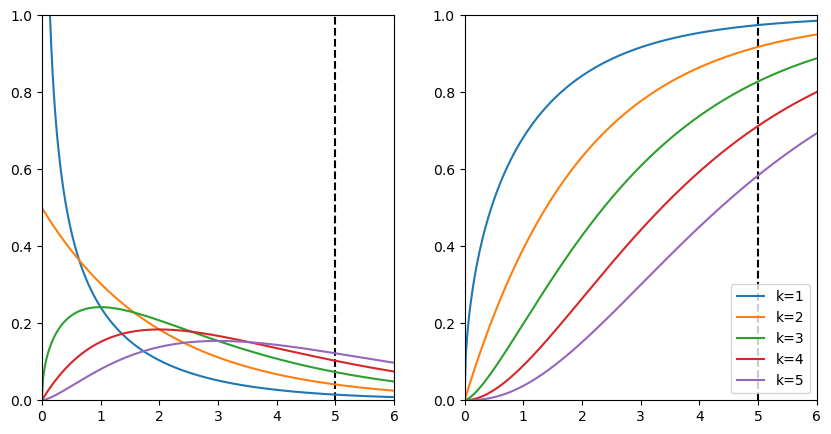

In [80]:
# Let's plot these distributions to see how they change
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_xlim(0,6)
ax[0].set_ylim(0,1)
ax[1].set_xlim(0,6)
ax[1].set_ylim(0,1)
ax[0].axvline(5, linestyle='--', c='k')
ax[1].axvline(5, linestyle='--', c='k')
for i in range(1,6):
    ax[0].plot(x, stats.chi2.pdf(x, df=i), label=f'k={i}')
    ax[1].plot(x, stats.chi2.cdf(x, df=i), label=f'k={i}')
plt.legend()
plt.show()

As the number of degrees of freedom increase, the probability of data being noise increases. As we can see from the plots, as k increase, the tail of the distribution grows, meaning there is a higher chance of finding signal-free data at higher values.

## Non-continuous distributions
### 1) A:
A poisson distribution is a probability distribution for independent discrete events. In other words events where either they happen or they don't and the probability they happen is not effected by previous events. For example, counting the number of incoming photons from some source. It's probability mass function, which is like a probability density function except it's discrete, is

$$
f(k) = e^{-\mu}\frac{\mu^k}{k!}
$$

where $\mu$ is the shape parameter, which is the average number of events over a time interval and also variance of the distribution, and k is the number of events.

### B:

Plotting distributions with a range of parameters, we can see how they change.

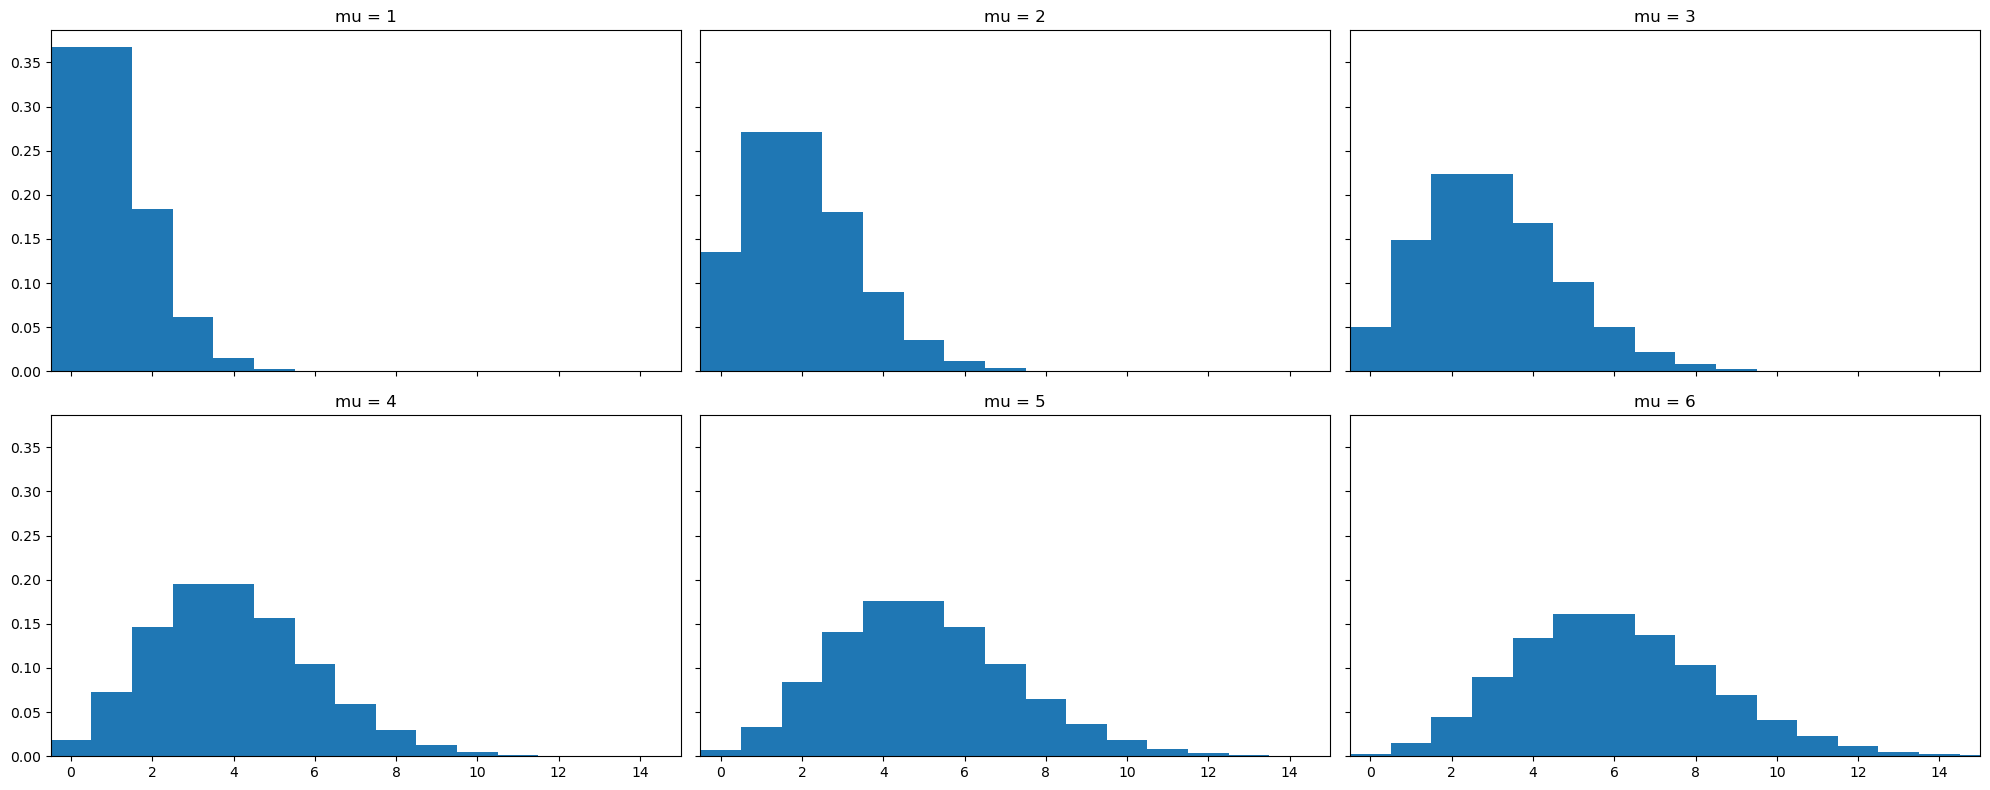

In [213]:
from scipy.stats import poisson

x = np.arange(0, 101)
k = np.arange(0, 100)
mu = 1
fig, ax = plt.subplots(2,3, figsize=(20,8), sharex=True, sharey=True)
for m in range(0,2):
    for n in range(0,3):
        ax[m,n].stairs(poisson.pmf(k,mu), x-0.5, fill=True)
        ax[m,n].set_xlim(-0.5,15)
        ax[m,n].set_title(f'mu = {mu}')
        mu += 1
plt.tight_layout()

Each step on the plot represents the probability of getting that number of events in a given time. As the shape parameter, $\mu$, is increased, the distribution gets wider and shifts to the left. The probability density of the possible counts also decrease. This means that a higher $\mu$ means there's a higher chance of getting a greater count, a lower chance of getting a lesser count, and a wider range of possibilities for which counts you can get.

### C:
For our hypothetical question, we want to find the probability of measuring a certain number of events or more, given signal-free data with a Poisson distribution. We'll say that we want a count of at least 10 for it to be a signal. To find the probability, we sum the total probability of that number of events or more on the Poisson distribution to see what the chance of the measurement being a real signal. Just like with discrete distributions, we can use the cdf() function.

In [224]:
for i in range(1, 7):
    mu = i
    p = poisson.cdf(k=10, mu=mu)
    print(f'For mu={mu}, the probability is {1-p:0.4e} = {abs(stats.norm.ppf(1-p)):0.4f} sigma.')

For mu=1, the probability is 1.0048e-08 = 5.6112 sigma.
For mu=2, the probability is 8.3082e-06 = 4.3061 sigma.
For mu=3, the probability is 2.9234e-04 = 3.4386 sigma.
For mu=4, the probability is 2.8398e-03 = 2.7657 sigma.
For mu=5, the probability is 1.3695e-02 = 2.2059 sigma.
For mu=6, the probability is 4.2621e-02 = 1.7210 sigma.


### D:
There's a finite number of discrete possibilities, and their total probability add up to 1. This is different than a continuous distribution, where there are infinitely many possible values, and finding the probability in a range requires integrating over that range. You can't find the probability of one specific value in a continuous distribution because integrating a single point gives you 0. 

Since a Poisson distribution gives the probability of a number of events in a time interval, this can have implications for experiments involving it, such as how long measurements are taken for. For instance, there can be a high chance of 0 events, so taking measurements over too short of time might not give you any data.

### E:
The average value doesn't have to be an integer because, even though you can only get an integer number of events, the average is the average value taken over some number of intervals. For example, if you get 5 counts for one interval, and 6 for the next, the average is 5.5, despite the fact you can't count 5.5. No matter what the value of $\mu$, the different possible counts will always be discrete numbers.